In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import sklearn

In [30]:
df= pd.read_csv("doctolib_simplified_dataset_01.csv")
df.head()


,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Quartier Saint-Germain-l'Auxerrois,0,1,0,0,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,0,0,0,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Quartier des Halles,0,0,0,0,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,Quartier du Palais-Royal,0,0,0,0,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,Quartier Saint-Germain-l'Auxerrois,0,1,1,0,0,0,No


In [46]:
df.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,31906.540939,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55263.000000,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82894.500000,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,110526.000000,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      110527 non-null  int64  
 1   PatientId       110527 non-null  float64
 2   AppointmentID   110527 non-null  int64  
 3   Gender          110527 non-null  object 
 4   ScheduledDay    110527 non-null  object 
 5   AppointmentDay  110527 non-null  object 
 6   Age             110527 non-null  int64  
 7   Neighbourhood   110527 non-null  object 
 8   Scholarship     110527 non-null  int64  
 9   Hypertension    110527 non-null  int64  
 10  Diabetes        110527 non-null  int64  
 11  Alcoholism      110527 non-null  int64  
 12  Handcap         110527 non-null  int64  
 13  SMS_received    110527 non-null  int64  
 14  No-show         110527 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


In [31]:
df_featured= df.drop(['PatientId', 'AppointmentID', 'Unnamed: 0'], axis=1)
df_featured.rename(columns={'No-show': 'no_show'}, inplace=True)
df_featured.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [32]:
df_featured['no_show']= df_featured['no_show'].map({'No':0, 'Yes':1})

C:\Users\serda\AppData\Local\Temp\ipykernel_19792\1388888862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_featured.corr(), annot=True)


<Axes: >

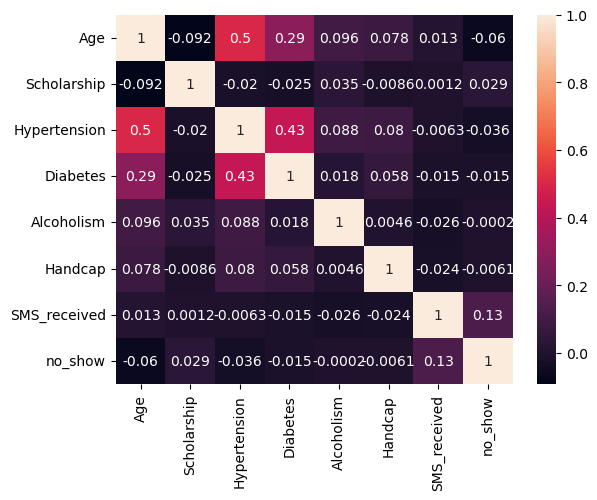

In [5]:
import seaborn as sns

sns.heatmap(df_featured.corr(), annot=True)

In [33]:
df_featured=df_featured.drop('Alcoholism', axis=1) #not much related

In [34]:
df_featured= df_featured.drop('Neighbourhood', axis=1) #difficult to convertir OneHot - maybe later

In [35]:
df_featured=df_featured.drop('Handcap', axis=1) #not much related

In [36]:
df_featured.Gender= df_featured.Gender.map({'F':0, 'M':1})
df_featured.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,SMS_received,no_show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0


In [37]:
df_featured.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [38]:
df_featured['ScheduledDay'] = pd.to_datetime(df_featured['ScheduledDay'])
df_featured['AppointmentDay'] = pd.to_datetime(df_featured['AppointmentDay'])

df_featured["ScheduledDay_DOW"] = df_featured["ScheduledDay"].dt.day_name()
df_featured["AppointmentDay_DOW"] = df_featured["AppointmentDay"].dt.day_name()
df_featured["ScheduledDay_month"] = df_featured["ScheduledDay"].dt.month
df_featured["AppointmentDay_month"] = df_featured["AppointmentDay"].dt.month

In [39]:
df_featured.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [40]:
df_featured.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,SMS_received,no_show,ScheduledDay_DOW,AppointmentDay_DOW,ScheduledDay_month,AppointmentDay_month
0,0,62,0,1,0,0,0,Friday,Friday,4,4
1,1,56,0,0,0,0,0,Friday,Friday,4,4
2,0,62,0,0,0,0,0,Friday,Friday,4,4
3,0,8,0,0,0,0,0,Friday,Friday,4,4
4,0,56,0,1,1,0,0,Friday,Friday,4,4


C:\Users\serda\AppData\Local\Temp\ipykernel_19792\4140334790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_featured.corr(), annot=True)


<Axes: >

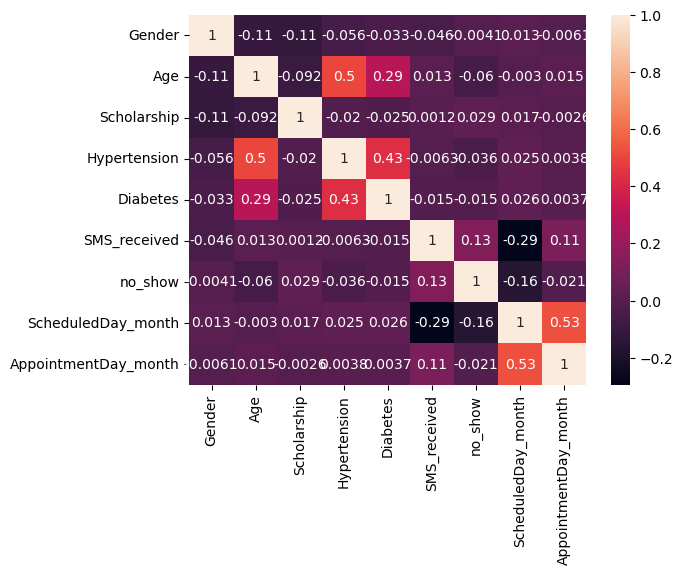

In [41]:
sns.heatmap(df_featured.corr(), annot=True)

In [42]:
df_featured = pd.get_dummies(df_featured, columns=['ScheduledDay_DOW', 'AppointmentDay_DOW', 'ScheduledDay_month', 'AppointmentDay_month'], drop_first=True)

In [43]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Gender                        110527 non-null  int64
 1   Age                           110527 non-null  int64
 2   Scholarship                   110527 non-null  int64
 3   Hypertension                  110527 non-null  int64
 4   Diabetes                      110527 non-null  int64
 5   SMS_received                  110527 non-null  int64
 6   no_show                       110527 non-null  int64
 7   ScheduledDay_DOW_Monday       110527 non-null  uint8
 8   ScheduledDay_DOW_Saturday     110527 non-null  uint8
 9   ScheduledDay_DOW_Thursday     110527 non-null  uint8
 10  ScheduledDay_DOW_Tuesday      110527 non-null  uint8
 11  ScheduledDay_DOW_Wednesday    110527 non-null  uint8
 12  AppointmentDay_DOW_Monday     110527 non-null  uint8
 13  AppointmentDay

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

X=df_featured.drop('no_show', axis=1)
y= df_featured['no_show']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)


In [69]:
###ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(32, input_dim=25, activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=25, batch_size=32)



Epoch 1/25
2418/2418 [==============================] - 2s 769us/step - loss: 0.4895 - accuracy: 0.7965
Epoch 2/25
2418/2418 [==============================] - 2s 755us/step - loss: 0.4744 - accuracy: 0.7974
Epoch 3/25
2418/2418 [==============================] - 2s 759us/step - loss: 0.4660 - accuracy: 0.7974
Epoch 4/25
2418/2418 [==============================] - 2s 752us/step - loss: 0.4623 - accuracy: 0.7975
Epoch 5/25
2418/2418 [==============================] - 2s 762us/step - loss: 0.4593 - accuracy: 0.7974
Epoch 6/25
2418/2418 [==============================] - 2s 760us/step - loss: 0.4576 - accuracy: 0.7976
Epoch 7/25
2418/2418 [==============================] - 2s 761us/step - loss: 0.4567 - accuracy: 0.7976
Epoch 8/25
2418/2418 [==============================] - 2s 792us/step - loss: 0.4556 - accuracy: 0.7974
Epoch 9/25
2418/2418 [==============================] - 2s 761us/step - loss: 0.4545 - accuracy: 0.7976
Epoch 10/25
2418/2418 [==============================] - 2s 755u

In [70]:
ann_y_pred_prob = ann_model.predict(X_test)
ann_y_pred = np.argmax(ann_y_pred_prob, axis=1)

1037/1037 [==============================] - 1s 570us/step


In [71]:
ann_y_pred_prob

array([[0.05130049],
       [0.32173178],
       [0.29205894],
       ...,
       [0.2962324 ],
       [0.27742797],
       [0.09697124]], dtype=float32)

In [72]:
###ANN metrics

from sklearn.metrics import classification_report, roc_auc_score

loss, accuracy = ann_model.evaluate(X_test, y_test)

ann_y_pred_prob = ann_model.predict(X_test)
ann_y_pred = (ann_y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, ann_y_pred))

auc_roc = roc_auc_score(y_test, ann_y_pred_prob)
print("AUC-ROC:", auc_roc)

1037/1037 [==============================] - 1s 620us/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26525
           1       0.48      0.01      0.02      6634

    accuracy                           0.80     33159
   macro avg       0.64      0.50      0.45     33159
weighted avg       0.74      0.80      0.71     33159

AUC-ROC: 0.7054880109520628
